In [146]:
%matplotlib inline


In [147]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Import your data into a Pandas DataFrame.

In [148]:
ride_csv = Path("/Users/jeremy/Docs/OSU_Bootcamp/Mod_5_PyBer/PyBer_Analysis/Resources/ride_data.csv")
city_csv = Path("/Users/jeremy/Docs/OSU_Bootcamp/Mod_5_PyBer/PyBer_Analysis/Resources/city_data.csv")

city_df = pd.read_csv(city_csv)
ride_df = pd.read_csv(ride_csv)

In [149]:
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [150]:
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344



# Inspect/Merge your DataFrames.


##### Inspecting city_df

In [151]:
# Get all the rows that contain null values.
city_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [152]:
# Make sure the driver_count column has an integer data type.
city_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [153]:
# Find out how many data points there are for each type of city.
city_df['type'].value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

##### Inspect ride_df

In [154]:
# Get all the rows that contain null values.
ride_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [155]:
# Make sure the driver_count column has an integer data type.
ride_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [156]:
Pyber_df = pd.merge(ride_df,city_df,how='left',on=['city','city'])

Pyber_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


### Create new dataframes to isolate data

In [157]:
urban_df = Pyber_df[Pyber_df['type']=='Urban']
urban_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [158]:
suburban_df = Pyber_df[Pyber_df['type']=='Suburban']
suburban_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [159]:
rural_df = Pyber_df[Pyber_df['type']=="Rural"]
rural_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


### Determine the mean, median, and mode for the following:


### The total number of rides for each city type.


In [160]:
rural_rides = rural_df.groupby('city').count()['ride_id']

rural_rides


city
Bradshawfurt         10
Garzaport             3
Harringtonfort        6
Jessicaport           6
Lake Jamie            6
Lake Latoyabury      11
Michaelberg          12
New Ryantown          6
Newtonview            4
North Holly           9
North Jaime           8
Penaborough           5
Randallchester        5
South Jennifer        7
South Marychester     8
South Saramouth       4
Taylorhaven           6
West Heather          9
Name: ride_id, dtype: int64

In [161]:
urban_rides = urban_df.groupby('city').count()['ride_id']
urban_rides

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [162]:
suburban_rides = suburban_df.groupby('city').count()['ride_id']
suburban_rides

city
Barronchester         16
Bethanyland           18
Brandonfort           19
Colemanland           22
Davidfurt             17
East Aaronbury         9
East Danielview       17
East Kentstad         13
East Marymouth        27
Grayville             15
Josephside            27
Lake Ann              12
Lake Omar             14
Lake Robertside       25
Lake Scott            18
Lewishaven            12
Lewisland             17
Mezachester           17
Myersshire            16
New Olivia            17
New Raymond           22
New Shannonberg       17
Nicolechester         19
North Jeffrey         13
North Richardhaven    14
North Timothy         15
Port Shane            19
Rodriguezview         15
Sotoville             11
South Brenda          24
South Teresa          22
Veronicaberg          17
Victoriaport          14
West Hannah           21
West Kimmouth         20
Williamsonville       14
Name: ride_id, dtype: int64

### The average fares for each city type.


In [163]:
rural_fare = rural_df.groupby('city').mean()['fare']
rural_fare


city
Bradshawfurt         40.064000
Garzaport            24.123333
Harringtonfort       33.470000
Jessicaport          36.013333
Lake Jamie           34.358333
Lake Latoyabury      26.061818
Michaelberg          34.997500
New Ryantown         43.278333
Newtonview           36.745000
North Holly          29.130000
North Jaime          30.802500
Penaborough          35.246000
Randallchester       29.742000
South Jennifer       35.264286
South Marychester    41.870000
South Saramouth      36.160000
Taylorhaven          42.263333
West Heather         33.890000
Name: fare, dtype: float64

In [164]:
urban_fare = urban_df.groupby('city').mean()['fare']
urban_fare


city
Amandaburgh            24.641667
Barajasview            25.332273
Carriemouth            28.314444
Christopherfurt        24.501852
Deanville              25.842632
                         ...    
West Patrickchester    28.233125
West Robert            25.123871
West Samuelburgh       21.767600
Williamsstad           24.362174
Williamsview           26.599000
Name: fare, Length: 66, dtype: float64

In [165]:
suburban_fare = suburban_df.groupby('city').mean()['fare']
suburban_fare

city
Barronchester         36.422500
Bethanyland           32.956111
Brandonfort           35.437368
Colemanland           30.894545
Davidfurt             31.995882
East Aaronbury        25.661111
East Danielview       31.560588
East Kentstad         29.823077
East Marymouth        30.835185
Grayville             27.763333
Josephside            32.858148
Lake Ann              30.890000
Lake Omar             28.075000
Lake Robertside       31.262000
Lake Scott            31.886111
Lewishaven            25.241667
Lewisland             34.614118
Mezachester           30.760000
Myersshire            30.203125
New Olivia            34.054118
New Raymond           27.961818
New Shannonberg       28.378235
Nicolechester         30.909474
North Jeffrey         29.242308
North Richardhaven    24.704286
North Timothy         31.262000
Port Shane            31.077895
Rodriguezview         30.745333
Sotoville             31.980000
South Brenda          33.964583
South Teresa          31.220455
Ver

### The average number of drivers for each city type.


In [166]:
rural_driver = rural_df.groupby('city').mean()["driver_count"]
rural_driver

city
Bradshawfurt         7.0
Garzaport            7.0
Harringtonfort       4.0
Jessicaport          1.0
Lake Jamie           4.0
Lake Latoyabury      2.0
Michaelberg          6.0
New Ryantown         2.0
Newtonview           1.0
North Holly          8.0
North Jaime          1.0
Penaborough          6.0
Randallchester       9.0
South Jennifer       7.0
South Marychester    1.0
South Saramouth      7.0
Taylorhaven          1.0
West Heather         4.0
Name: driver_count, dtype: float64

In [167]:
urban_driver = urban_df.groupby('city').mean()['driver_count']
urban_driver.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [168]:
suburban_driver = suburban_df.groupby('city').mean()['driver_count']
suburban_driver.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

### Create a bubble chart that showcases the average fare versus the total number of rides with bubble size based on the average number of drivers for each city type.


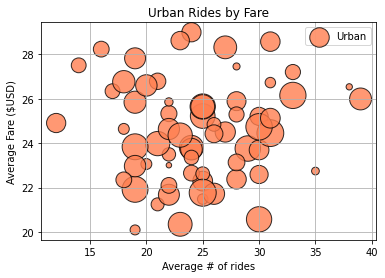

In [169]:
fig, ax = plt.subplots()

ax.scatter(urban_rides,urban_fare, s=urban_driver*10,c='coral',edgecolors="black",alpha=.8,linewidth=1,label='Urban')

ax.set_title("Urban Rides by Fare")
ax.set_xlabel("Average # of rides")
ax.set_ylabel("Average Fare ($USD)")
ax.grid(True)
ax.legend()

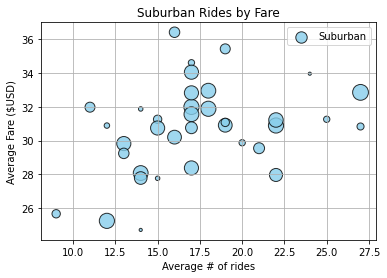

In [170]:
fig, ax = plt.subplots()


ax.scatter(suburban_rides,suburban_fare, s=suburban_driver*10,c='skyblue',edgecolors="black",alpha=.8,linewidth=1,label='Suburban')
ax.set_title("Suburban Rides by Fare")
ax.set_xlabel("Average # of rides")
ax.set_ylabel("Average Fare ($USD)")
ax.grid(True)
ax.legend()

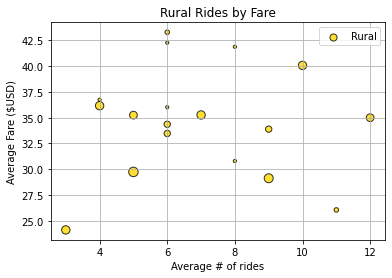

In [171]:
fig, ax = plt.subplots()

ax.scatter(rural_rides,rural_fare, s=rural_driver*10,c='gold',edgecolors="black",alpha=.8,linewidth=1,label='Rural')
ax.set_title("Rural Rides by Fare")
ax.set_xlabel("Average # of rides")
ax.set_ylabel("Average Fare ($USD)")
ax.grid(True)
ax.legend()

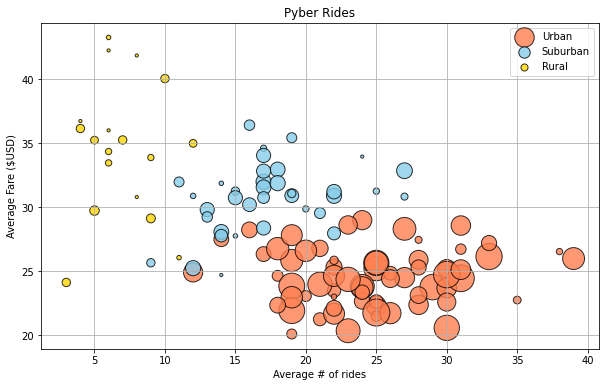

In [172]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(urban_rides,urban_fare, s=urban_driver*10,c='coral',edgecolors="black",alpha=.8,linewidth=1,label='Urban')
ax.scatter(suburban_rides,suburban_fare, s=suburban_driver*10,c='skyblue',edgecolors="black",alpha=.8,linewidth=1,label='Suburban')
ax.scatter(rural_rides,rural_fare, s=rural_driver*10,c='gold',edgecolors="black",alpha=.8,linewidth=1,label='Rural')
ax.set_title("Pyber Rides")
ax.set_xlabel("Average # of rides")
ax.set_ylabel("Average Fare ($USD)")
ax.grid(True)
ax.legend()
plt.show()



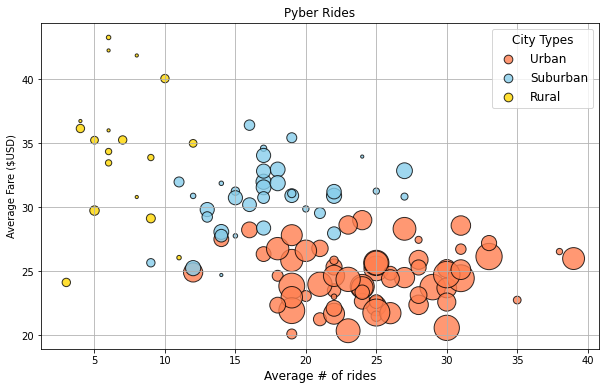

In [176]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(urban_rides,urban_fare, s=urban_driver*10,c='coral',edgecolors="black",alpha=.8,linewidth=1,label='Urban')
ax.scatter(suburban_rides,suburban_fare, s=suburban_driver*10,c='skyblue',edgecolors="black",alpha=.8,linewidth=1,label='Suburban')
ax.scatter(rural_rides,rural_fare, s=rural_driver*10,c='gold',edgecolors="black",alpha=.8,linewidth=1,label='Rural')
ax.set_title("Pyber Rides")
ax.set_xlabel("Average # of rides",fontsize=12)
ax.set_ylabel("Average Fare ($USD)")
ax.grid(True)
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
plt.show()

# Create box-and-whisker plots that visualize each of the following to determine if there are any outliers:


# The number of rides for each city type.


# The fares for each city type.


# The number of drivers for each city type.


# Create a pie chart that visualizes each of the following data for each city type:


# The percent of total fares.


# The percent of total rides.


# The percent of total drivers.